<a href="https://colab.research.google.com/github/PauGuiu/ml_experiments/blob/main/Copia_de_AnalisisNetflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALISIS DE CONSUMO DE NETFLIX CON PYTHON

## 1. IMPORTACION Y CARGA DE DATOS

In [1]:
from google.colab import files
datos = files.upload()

Saving NetflixViewingHistory.csv to NetflixViewingHistory.csv


In [2]:
import io
import pandas as pd

df = pd.read_csv(io.BytesIO(datos['NetflixViewingHistory.csv']))

## 2. ANALISIS EXPLORATORIO

In [3]:
df.shape

(3341, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Title   3341 non-null   object
 1   Date    3341 non-null   object
dtypes: object(2)
memory usage: 52.3+ KB


In [5]:
df.head(50)

,Title,Date
0,Closer,7/24/21
1,Metallica: Some Kind of Monster: Collection 1:...,7/24/21
2,This Is Pop: Season 1: The Brill Building in 4...,7/24/21
3,This Is Pop: Season 1: What Can a Song Do?,7/22/21
4,This Is Pop: Season 1: Festival Rising,7/22/21
5,This Is Pop: Season 1: Hail Britpop!,7/21/21
6,This Is Pop: Season 1: When Country Goes Pop,7/21/21
7,This Is Pop: Season 1: Stockholm Syndrome,7/20/21
8,This Is Pop: Season 1: Auto-Tune,7/20/21
9,This Is Pop: Season 1: The Boyz II Men Effect,7/20/21


Vemos que parece que existe un patrón en el que diferentes partes se se separan mediante dos puntos. Vamos a contar en cuantas partes distintas se seperan nuestros contenidos

In [6]:
separacion_lista = df.Title.str.split(pat = ':', expand=False).to_frame()
separacion_lista

,Title
0,[Closer]
1,"[Metallica, Some Kind of Monster, Collection..."
2,"[This Is Pop, Season 1, The Brill Building i..."
3,"[This Is Pop, Season 1, What Can a Song Do?]"
4,"[This Is Pop, Season 1, Festival Rising]"
...,...
3336,"[Don't Trust the B---- in Apartment 23, Seaso..."
3337,"[Don't Trust the B---- in Apartment 23, Seaso..."
3338,"[Don't Trust the B---- in Apartment 23, Seaso..."
3339,"[Don't Trust the B---- in Apartment 23, Seaso..."


In [7]:
separacion_lista['num_partes'] = separacion_lista.Title.apply(len)
separacion_lista

,Title,num_partes
0,[Closer],1
1,"[Metallica, Some Kind of Monster, Collection...",5
2,"[This Is Pop, Season 1, The Brill Building i...",3
3,"[This Is Pop, Season 1, What Can a Song Do?]",3
4,"[This Is Pop, Season 1, Festival Rising]",3
...,...,...
3336,"[Don't Trust the B---- in Apartment 23, Seaso...",3
3337,"[Don't Trust the B---- in Apartment 23, Seaso...",3
3338,"[Don't Trust the B---- in Apartment 23, Seaso...",3
3339,"[Don't Trust the B---- in Apartment 23, Seaso...",3


In [8]:
separacion_lista.num_partes.value_counts()

3    2706
1     353
4     202
2      60
5      12
6       8
Name: num_partes, dtype: int64

Vamos a analizar los títulos por número de partes a ver si hay algún patrón.

In [9]:
separacion_lista.loc[separacion_lista.num_partes == 1].head(10)

,Title,num_partes
0,[Closer],1
17,[The Leisure Seeker],1
18,[The Interpreter],1
19,[The Death of Stalin],1
22,[It's Complicated],1
25,[Sicario],1
35,[The Ballad of Buster Scruggs],1
36,[Everest],1
37,[Schindler's List],1
48,[Stowaway],1


In [10]:
separacion_lista.loc[separacion_lista.num_partes == 2].head(10)

,Title,num_partes
15,"[Master and Commander, The Far Side of the Wo...",2
247,"[Made You Look, A True Story About Fake Art]",2
347,"[Cowspiracy, The Sustainability Secret]",2
388,"[American Murder, The Family Next Door]",2
393,"[Brave Blue World, Racing to Solve Our Water ...",2
451,"[David Attenborough, A Life on Our Planet]",2
527,"[Berlin, Berlin, Lolle on the Run]",2
559,"[The Godfather, Part III]",2
579,"[The Godfather, Part II]",2
602,"[Gabo, The Creation of Gabriel García Márquez]",2


In [11]:
separacion_lista.loc[separacion_lista.num_partes == 3].head(10)

,Title,num_partes
2,"[This Is Pop, Season 1, The Brill Building i...",3
3,"[This Is Pop, Season 1, What Can a Song Do?]",3
4,"[This Is Pop, Season 1, Festival Rising]",3
5,"[This Is Pop, Season 1, Hail Britpop!]",3
6,"[This Is Pop, Season 1, When Country Goes Pop]",3
7,"[This Is Pop, Season 1, Stockholm Syndrome]",3
8,"[This Is Pop, Season 1, Auto-Tune]",3
9,"[This Is Pop, Season 1, The Boyz II Men Effect]",3
10,"[How to Become a Tyrant, Season 1, Rule Fore...",3
11,"[How to Become a Tyrant, Season 1, Create a ...",3


In [12]:
separacion_lista.loc[separacion_lista.num_partes == 4].head(10)

,Title,num_partes
40,"[High on the Hog, How African American Cuisin...",4
41,"[High on the Hog, How African American Cuisin...",4
49,"[High on the Hog, How African American Cuisin...",4
52,"[High on the Hog, How African American Cuisin...",4
61,"[Human, The World Within, Season 1, React]",4
104,"[This Is a Robbery, The World's Biggest Art H...",4
105,"[This Is a Robbery, The World's Biggest Art H...",4
106,"[This Is a Robbery, The World's Biggest Art H...",4
107,"[This Is a Robbery, The World's Biggest Art H...",4
260,"[Self Made, Inspired by the Life of Madam C.J...",4


In [13]:
separacion_lista.loc[separacion_lista.num_partes == 5].head(10)

,Title,num_partes
1,"[Metallica, Some Kind of Monster, Collection...",5
1092,"[Abstract, The Art of Design, Season 1, Es ...",5
2051,"[Evil Genius, the True Story of America's Mos...",5
2052,"[Evil Genius, the True Story of America's Mos...",5
2053,"[Evil Genius, the True Story of America's Mos...",5
2644,"[Abstract, The Art of Design, Season 1, Tin...",5
2645,"[Abstract, The Art of Design, Season 1, Chr...",5
3160,"[TED Talks, Life Hack, Life Hack, Andy Pudd...",5
3170,"[TED Talks, Life Hack, Life Hack, Jane McGo...",5
3171,"[TED Talks, Life Hack, Life Hack, Amy Cuddy...",5


## 3. CREACIÓN DE VARIABLES

Nuestro dataset original tiene muy pocas variables, pero con un poco de trabajo podemos generar nuevas variables. Este proceso se llama "feature extraction".

### 3.1 VARIABLES DERIVADAS DEL TÍTULO

In [14]:
import numpy as np

separacion_lista['tipo'] = np.where(separacion_lista.num_partes <3, 'pelicula', 'serie')
separacion_lista

,Title,num_partes,tipo
0,[Closer],1,pelicula
1,"[Metallica, Some Kind of Monster, Collection...",5,serie
2,"[This Is Pop, Season 1, The Brill Building i...",3,serie
3,"[This Is Pop, Season 1, What Can a Song Do?]",3,serie
4,"[This Is Pop, Season 1, Festival Rising]",3,serie
...,...,...,...
3336,"[Don't Trust the B---- in Apartment 23, Seaso...",3,serie
3337,"[Don't Trust the B---- in Apartment 23, Seaso...",3,serie
3338,"[Don't Trust the B---- in Apartment 23, Seaso...",3,serie
3339,"[Don't Trust the B---- in Apartment 23, Seaso...",3,serie


In [15]:
df = pd.concat([df,separacion_lista['tipo']], axis = 1)
df

,Title,Date,tipo
0,Closer,7/24/21,pelicula
1,Metallica: Some Kind of Monster: Collection 1:...,7/24/21,serie
2,This Is Pop: Season 1: The Brill Building in 4...,7/24/21,serie
3,This Is Pop: Season 1: What Can a Song Do?,7/22/21,serie
4,This Is Pop: Season 1: Festival Rising,7/22/21,serie
...,...,...,...
3336,Don't Trust the B---- in Apartment 23: Season ...,3/23/15,serie
3337,Don't Trust the B---- in Apartment 23: Season ...,3/23/15,serie
3338,Don't Trust the B---- in Apartment 23: Season ...,3/23/15,serie
3339,Don't Trust the B---- in Apartment 23: Season ...,3/22/15,serie


Vamos a dividir los títulos en sus diferentes niveles y generar así nuevas variables

In [16]:
separacion_cols = df.Title.str.split(pat = ':', expand=True)
separacion_cols

,0,1,2,3,4,5
0,Closer,None,None,None,None,None
1,Metallica,Some Kind of Monster,Collection 1,Metallica,Some Kind of Monster,None
2,This Is Pop,Season 1,The Brill Building in 4 Songs,None,None,None
3,This Is Pop,Season 1,What Can a Song Do?,None,None,None
4,This Is Pop,Season 1,Festival Rising,None,None,None
...,...,...,...,...,...,...
3336,Don't Trust the B---- in Apartment 23,Season 2,Dating Games...,None,None,None
3337,Don't Trust the B---- in Apartment 23,Season 2,Monday June...,None,None,None
3338,Don't Trust the B---- in Apartment 23,Season 2,Teddy Trouble...,None,None,None
3339,Don't Trust the B---- in Apartment 23,Season 2,Paris...,None,None,None


In [17]:
separacion_cols.columns = ['nivel1','nivel2','nivel3','nivel4','nivel5','nivel6']
separacion_cols

,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6
0,Closer,None,None,None,None,None
1,Metallica,Some Kind of Monster,Collection 1,Metallica,Some Kind of Monster,None
2,This Is Pop,Season 1,The Brill Building in 4 Songs,None,None,None
3,This Is Pop,Season 1,What Can a Song Do?,None,None,None
4,This Is Pop,Season 1,Festival Rising,None,None,None
...,...,...,...,...,...,...
3336,Don't Trust the B---- in Apartment 23,Season 2,Dating Games...,None,None,None
3337,Don't Trust the B---- in Apartment 23,Season 2,Monday June...,None,None,None
3338,Don't Trust the B---- in Apartment 23,Season 2,Teddy Trouble...,None,None,None
3339,Don't Trust the B---- in Apartment 23,Season 2,Paris...,None,None,None


In [18]:
df = pd.concat([df,separacion_cols], axis = 1)
df

,Title,Date,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6
0,Closer,7/24/21,pelicula,Closer,None,None,None,None,None
1,Metallica: Some Kind of Monster: Collection 1:...,7/24/21,serie,Metallica,Some Kind of Monster,Collection 1,Metallica,Some Kind of Monster,None
2,This Is Pop: Season 1: The Brill Building in 4...,7/24/21,serie,This Is Pop,Season 1,The Brill Building in 4 Songs,None,None,None
3,This Is Pop: Season 1: What Can a Song Do?,7/22/21,serie,This Is Pop,Season 1,What Can a Song Do?,None,None,None
4,This Is Pop: Season 1: Festival Rising,7/22/21,serie,This Is Pop,Season 1,Festival Rising,None,None,None
...,...,...,...,...,...,...,...,...,...
3336,Don't Trust the B---- in Apartment 23: Season ...,3/23/15,serie,Don't Trust the B---- in Apartment 23,Season 2,Dating Games...,None,None,None
3337,Don't Trust the B---- in Apartment 23: Season ...,3/23/15,serie,Don't Trust the B---- in Apartment 23,Season 2,Monday June...,None,None,None
3338,Don't Trust the B---- in Apartment 23: Season ...,3/23/15,serie,Don't Trust the B---- in Apartment 23,Season 2,Teddy Trouble...,None,None,None
3339,Don't Trust the B---- in Apartment 23: Season ...,3/22/15,serie,Don't Trust the B---- in Apartment 23,Season 2,Paris...,None,None,None


### 3.2 VARIABLES DERIVADAS DE LA FECHA

Podemos extraer los diferentes compontentes de una fecha para generar nuevas variables.

In [19]:
df['fecha'] = pd.to_datetime(df.Date)
df.drop(columns = 'Date',inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,fecha
0,Closer,pelicula,Closer,None,None,None,None,None,2021-07-24
1,Metallica: Some Kind of Monster: Collection 1:...,serie,Metallica,Some Kind of Monster,Collection 1,Metallica,Some Kind of Monster,None,2021-07-24
2,This Is Pop: Season 1: The Brill Building in 4...,serie,This Is Pop,Season 1,The Brill Building in 4 Songs,None,None,None,2021-07-24
3,This Is Pop: Season 1: What Can a Song Do?,serie,This Is Pop,Season 1,What Can a Song Do?,None,None,None,2021-07-22
4,This Is Pop: Season 1: Festival Rising,serie,This Is Pop,Season 1,Festival Rising,None,None,None,2021-07-22
...,...,...,...,...,...,...,...,...,...
3336,Don't Trust the B---- in Apartment 23: Season ...,serie,Don't Trust the B---- in Apartment 23,Season 2,Dating Games...,None,None,None,2015-03-23
3337,Don't Trust the B---- in Apartment 23: Season ...,serie,Don't Trust the B---- in Apartment 23,Season 2,Monday June...,None,None,None,2015-03-23
3338,Don't Trust the B---- in Apartment 23: Season ...,serie,Don't Trust the B---- in Apartment 23,Season 2,Teddy Trouble...,None,None,None,2015-03-23
3339,Don't Trust the B---- in Apartment 23: Season ...,serie,Don't Trust the B---- in Apartment 23,Season 2,Paris...,None,None,None,2015-03-22


In [20]:
df.set_index('fecha', inplace = True)
df

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6
fecha,,,,,,,,
2021-07-24,Closer,pelicula,Closer,None,None,None,None,None
2021-07-24,Metallica: Some Kind of Monster: Collection 1:...,serie,Metallica,Some Kind of Monster,Collection 1,Metallica,Some Kind of Monster,None
2021-07-24,This Is Pop: Season 1: The Brill Building in 4...,serie,This Is Pop,Season 1,The Brill Building in 4 Songs,None,None,None
2021-07-22,This Is Pop: Season 1: What Can a Song Do?,serie,This Is Pop,Season 1,What Can a Song Do?,None,None,None
2021-07-22,This Is Pop: Season 1: Festival Rising,serie,This Is Pop,Season 1,Festival Rising,None,None,None
...,...,...,...,...,...,...,...,...
2015-03-23,Don't Trust the B---- in Apartment 23: Season ...,serie,Don't Trust the B---- in Apartment 23,Season 2,Dating Games...,None,None,None
2015-03-23,Don't Trust the B---- in Apartment 23: Season ...,serie,Don't Trust the B---- in Apartment 23,Season 2,Monday June...,None,None,None
2015-03-23,Don't Trust the B---- in Apartment 23: Season ...,serie,Don't Trust the B---- in Apartment 23,Season 2,Teddy Trouble...,None,None,None


Creamos una función para extraer los componentes.

In [21]:
def atributos_fechas(data):
  data['año'] = data.index.year
  data['mes'] = data.index.month_name()
  data['dia_mes'] = data.index.day
  data['dia_semana'] = data.index.day_name()
  return(data)

In [22]:
atributos_fechas(df)

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,,
2021-07-24,Closer,pelicula,Closer,None,None,None,None,None,2021,July,24,Saturday
2021-07-24,Metallica: Some Kind of Monster: Collection 1:...,serie,Metallica,Some Kind of Monster,Collection 1,Metallica,Some Kind of Monster,None,2021,July,24,Saturday
2021-07-24,This Is Pop: Season 1: The Brill Building in 4...,serie,This Is Pop,Season 1,The Brill Building in 4 Songs,None,None,None,2021,July,24,Saturday
2021-07-22,This Is Pop: Season 1: What Can a Song Do?,serie,This Is Pop,Season 1,What Can a Song Do?,None,None,None,2021,July,22,Thursday
2021-07-22,This Is Pop: Season 1: Festival Rising,serie,This Is Pop,Season 1,Festival Rising,None,None,None,2021,July,22,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-23,Don't Trust the B---- in Apartment 23: Season ...,serie,Don't Trust the B---- in Apartment 23,Season 2,Dating Games...,None,None,None,2015,March,23,Monday
2015-03-23,Don't Trust the B---- in Apartment 23: Season ...,serie,Don't Trust the B---- in Apartment 23,Season 2,Monday June...,None,None,None,2015,March,23,Monday
2015-03-23,Don't Trust the B---- in Apartment 23: Season ...,serie,Don't Trust the B---- in Apartment 23,Season 2,Teddy Trouble...,None,None,None,2015,March,23,Monday


## 4. ANALISIS

¿Cuanto tiempo hace que tengo contratado Netflix?

In [24]:
from datetime import date

hoy = pd.Timestamp(date.today())

primer_dia = df.index.min()

tiempo = hoy - primer_dia

print(f'Maria Victoria, llevas usando Netflix {tiempo.days} dias')

Maria Victoria, llevas usando Netflix 2352 dias


¿Cuanto me he gastado en Netflix hasta ahora?

In [25]:
coste_mensual = 12

gasto = tiempo.days / 30 * coste_mensual

print(f'Maria Victoria, hasta ahora te has gastado {gasto} euros en Netflix')

Maria Victoria, hasta ahora te has gastado 940.8000000000001 euros en Netflix


¿Cuanto tiempo de mi vida le dedico cada año a Netflix?

In [27]:
media_min_serie = 45
media_min_peli = 100

consumo = df.loc[df.año < 2021].groupby('tipo').Title.count()

minutos_pelis_año = consumo['pelicula'] * media_min_peli / 3

minutos_series_año = consumo['serie'] * media_min_serie / 3

dias_pelis_año = minutos_pelis_año / 60 / 24

dias_series_año = minutos_series_año / 60 / 24

print(f'Maria Victoria, al año dedicas {round(dias_series_año)} dias de tu vida a ver series y {round(dias_pelis_año)} dias de tu vida a ver pelis')

Maria Victoria, al año dedicas 27 dias de tu vida a ver series y 8 dias de tu vida a ver pelis


¿Cuales son las 10 series de las que he visto más capítulos?

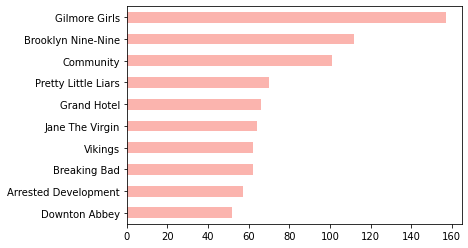

In [28]:
df.loc[df.tipo == 'serie'].nivel1.value_counts(ascending = True).tail(10).plot.barh(cmap = 'Pastel1');

Echo en falta mi serie favorita! Hijos de la Anarquía. Vamos a hacer una consulta de los títulos que incluyan ese nombre para ver por qué.

In [29]:
df[df.Title.str.contains('Hijos')]

,Title,tipo,nivel1,nivel2,nivel3,nivel4,nivel5,nivel6,año,mes,dia_mes,dia_semana
fecha,,,,,,,,,,,,
2018-06-22,Hijos de las Estrellas: Season 1: Secrets of t...,serie,Hijos de las Estrellas,Season 1,Secrets of the Sun,None,None,None,2018,June,22,Friday


¿Qué día de la semana suelo ver más series?

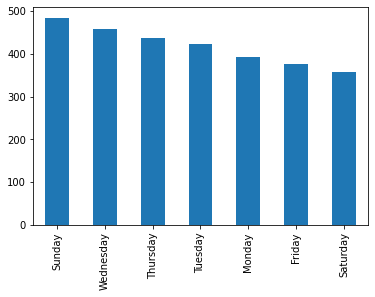

In [30]:
df.loc[df.tipo == 'serie', 'dia_semana'].value_counts().plot(kind = 'bar');

¿Existen diferencias en cuando veo Netflix entre series y películas?

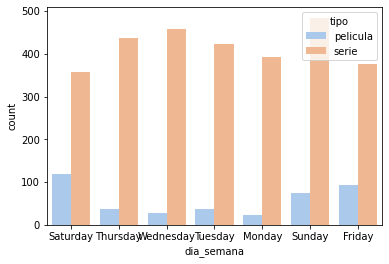

In [31]:
import seaborn as sns

sns.countplot(data = df, x = 'dia_semana', hue = 'tipo', palette= 'pastel');

¿El consumo a lo largo del año es constante o hay meses que consumo más?

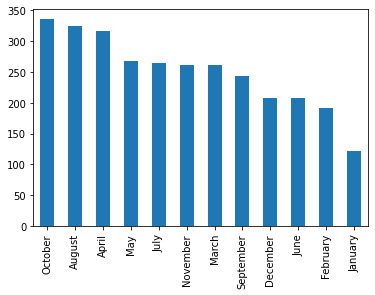

In [32]:
df.loc[df.año < 2021].mes.value_counts().plot.bar();

¿Afectó el confinamiento a la cantidad de uso que hice de Netflix?

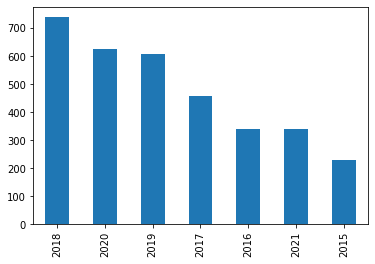

In [ ]:
df.año.value_counts().plot.bar();